# Project Scenario

Travelling has significantly changed thanks to technology. In the earlier days, it was not easy to travel as booking journeys used to be a hassle, where people needed to contact travel agents, get prices and then do a lot of paperwork.

But, with the advent of online apps, it becomes easier to book tickets. However, one challenge is still there. Due to many available apps which offer bookings, there can be a lot of comparisons for getting the best price.

A new Indian start-up, "MyNextBooking” is an aggregator on top of the available top platforms (Yatra, MMT, Goibibo). It helps the user compare prices for their upcoming journeys on its platform and the customer is redirected to the desired platform after looking at the price. 

However, they need to do a lot of analysis of the data which they have collected over a while.

As a newly hired analyst and profeciency in Python, your role is to help them perform an in-depth analysis.

Please provide answers to some questions. The answer to each question has been provided in the notebook.

# Project Objective

As a data analyst, I am tasked with performing an in-depth analysis of travel booking and session data for a startup, 'MyNextBooking,' which operates as an aggregator comparing prices across platforms like Yatra, MMT, and Goibibo. The analysis is intended to provide actionable insights to enhance user experience, improve business strategy, and maximize customer satisfaction. The data includes booking details, session activities, and search behaviors.

# Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Datasets

In [17]:
# Bookings.csv dataset contains information about bookings made through the aggregator platform. Each row represents a single booking
bookings = pd.read_csv('Bookings.csv')

# Sessions.csv dataset records information about user sessions on the aggregator platform. Each row represents a single session or search activity.
sessions = pd.read_csv('Sessions.csv')



In [18]:
bookings.head(3)

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0


In [19]:
sessions.head(3)

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN


In [20]:
## Combining the Data sets

# Merge bookings and sessions
merged_df = pd.merge(bookings, sessions, on='booking_id', how='inner')

# Display the merged dataframe
merged_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z


# 1. Find the number of distinct bookings, sessions, and searches from the given datasets.





In [21]:
# Number of distinct bookings

# Counting the distinct booking IDs to get the number of distinct bookings
distinct_bookings = bookings['booking_id'].nunique()
print(f"Number of distinct bookings = {distinct_bookings}")

# Number of distinct sessions

# Counting the distinct sessions IDs to get the number of distinct sessions
distinct_sessions = sessions['session_id'].nunique()
print(f"Number of distinct sessions = {distinct_sessions}")

# Number of distinct sessions

# Counting the distinct search IDs to get the number of distinct searches
distinct_searches = sessions['search_id'].nunique()
print(f"Number of distinct searches = {distinct_searches}")


Number of distinct bookings = 339
Number of distinct sessions = 331
Number of distinct searches = 1360


The output indicates that 339 unique bookings were completed across 331 sessions. This suggests a near one-to-one relationship between sessions and bookings. However, with 1,360 distinct searches, the data shows a significant gap between search activity and completed bookings. This highlights potential areas to improve search-to-booking conversion rates.



# 2. How many sections have more than one bookings?

In [22]:
# Grouping by session_id and count distinct booking_id values

session_booking_counts = sessions.groupby('session_id')['booking_id'].nunique()

# Filtering sessions with more than one booking

sessions_with_multiple_bookings = session_booking_counts[session_booking_counts > 1]

# Count the number of such sessions
num_sessions_with_multiple_bookings = sessions_with_multiple_bookings.shape[0]

print(f"Number of sessions with more than one booking: {num_sessions_with_multiple_bookings}")


Number of sessions with more than one booking: 10


Number of sessions with more than one booking: 10. This means that 10 sessions had more than one booking. It represents users who made multiple transactions during a single browsing session. This suggests the platform is catering to customers booking for groups or planning multiple trips. It highlights an opportunity to target these high-value users with promotions or bundled offers.

# 3. Which days of the week have the highest number of bookings? Also, draw a pie chat to show the distribution for all days of the week.

day_name
Friday       51
Monday       51
Saturday     44
Sunday       35
Thursday     65
Tuesday      59
Wednesday    34
Name: booking_id, dtype: int64

Days with the highest number of bookings:
day_name
Thursday    65
Name: booking_id, dtype: int64


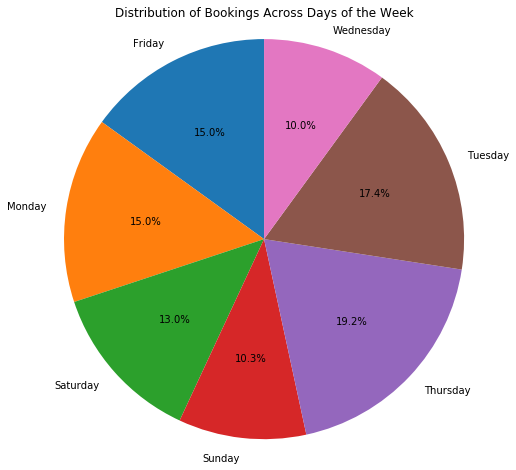

In [23]:
# Converting 'booking_time' to datetime objects
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

# Extracting the day of the week (0 = Monday, 6 = Sunday)
bookings['day_of_week'] = bookings['booking_time'].dt.dayofweek

# Mapping day numbers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bookings['day_name'] = bookings['day_of_week'].map(lambda x: day_names[x])

# Counting bookings for each day of the week
day_counts = bookings.groupby('day_name')['booking_id'].count()

# Finding days with the highest number of bookings
max_bookings_days = day_counts[day_counts == day_counts.max()]
print(day_counts)

print("\nDays with the highest number of bookings:")
print(max_bookings_days)

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Bookings Across Days of the Week')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Thursday, with 65 bookings, is the most popular day for making bookings. This indicates users are most active midweek, potentially planning for weekend travel. Businesses can target this trend by launching promotions or discounts on Thursdays to capitalize on user engagement and drive more conversions.

# 4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.


In [41]:
# Group by service_name and calculate the total bookings and total Gross Booking Value
service_summary = bookings.groupby('service_name').agg({
    'booking_id': 'count',  # Count the number of bookings
    'INR_Amount': 'sum'    # Sum the Gross Booking Value in INR
}).reset_index()

# Rename columns manually
service_summary.rename(columns={
    'booking_id': 'total_bookings',
    'INR_Amount': 'total_INR_Amount'
}, inplace=True)

# Display the result
print(service_summary)


  service_name  total_bookings  total_INR_Amount
0      GOIBIBO             186        5897637.97
1          MMT              48         665669.08
2        YATRA             105        3378702.13


Goibibo leads with the highest bookings (186) and Gross Booking Value (5,897,637.97), indicating strong user engagement and revenue generation. Yatra follows with 105 bookings and 3,378,702.13 in Gross Booking Value, while MMT lags behind with just 48 bookings and 665,669.08 in Gross Booking Value. This suggests Goibibo's dominance in performance, with opportunities to boost Yatra and MMT's market share.

# 5. For customers who have more than 1 booking, which is the most booked route (from_cityto to_city)?

The most booked route for customers with more than one booking is: Gurgaon to Roissy-en-France


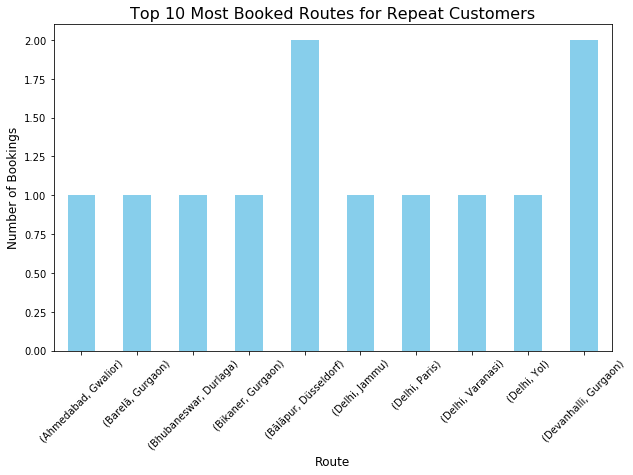

In [43]:
# Grouping by customer and count bookings
customer_bookings = bookings.groupby('customer_id')['booking_id'].count()

# Filtering for customers with more than 1 booking
repeat_customers = customer_bookings[customer_bookings > 1].index

# Filtering bookings for repeat customers
repeat_customer_bookings = bookings[bookings['customer_id'].isin(repeat_customers)]

# Counting occurrences of each route
route_counts = repeat_customer_bookings.groupby(['from_city', 'to_city'])['booking_id'].count()

# Finding the most booked route
most_booked_route = route_counts.idxmax()

print(f"The most booked route for customers with more than one booking is: {most_booked_route[0]} to {most_booked_route[1]}")


# Obtaining the top 10 routes

import matplotlib.pyplot as plt
top_routes = route_counts.head(10)

# Ploting a bar chart
plt.figure(figsize=(10, 6))
top_routes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Booked Routes for Repeat Customers', fontsize=16)
plt.xlabel('Route', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45)
plt.show()


The most booked route for customers with more than one booking is: Gurgaon to Roissy-en-France. This means that Gurgaon to Roissy-en-France is the most frequently booked route by customers who made more than one booking. This suggests that multiple customers prefer traveling between these two cities, signaling a potential high-demand route.


# 6. Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

In [45]:
grouped_by_departure_city = bookings.groupby(['to_city']).agg({'days_to_departure': ['mean', 'count']}).reset_index()
grouped_by_departure_city.columns = ['Departure_city', 'avg_days_to_departure', 'total_departures']
print(grouped_by_departure_city[grouped_by_departure_city['total_departures'] > 5].sort_values(by='avg_days_to_departure', ascending=False).head(3))

       Departure_city  avg_days_to_departure  total_departures
12             Berlin              41.181818                11
35  Frankfurt am Main              34.877551                49
79   Roissy-en-France              32.100000                20


The output shows that Berlin, Frankfurt am Main, and Roissy-en-France are the top 3 departure cities with the highest average days to departure, indicating that customers from these cities tend to book their flights well in advance. Berlin has an average of 41.18 days, Frankfurt 34.88 days, and Roissy-en-France 32.1 days, with at least 11, 49, and 20 departures respectively. This suggests strong advance booking behavior from these locations.





# 7. Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset,have the maximum correlation?

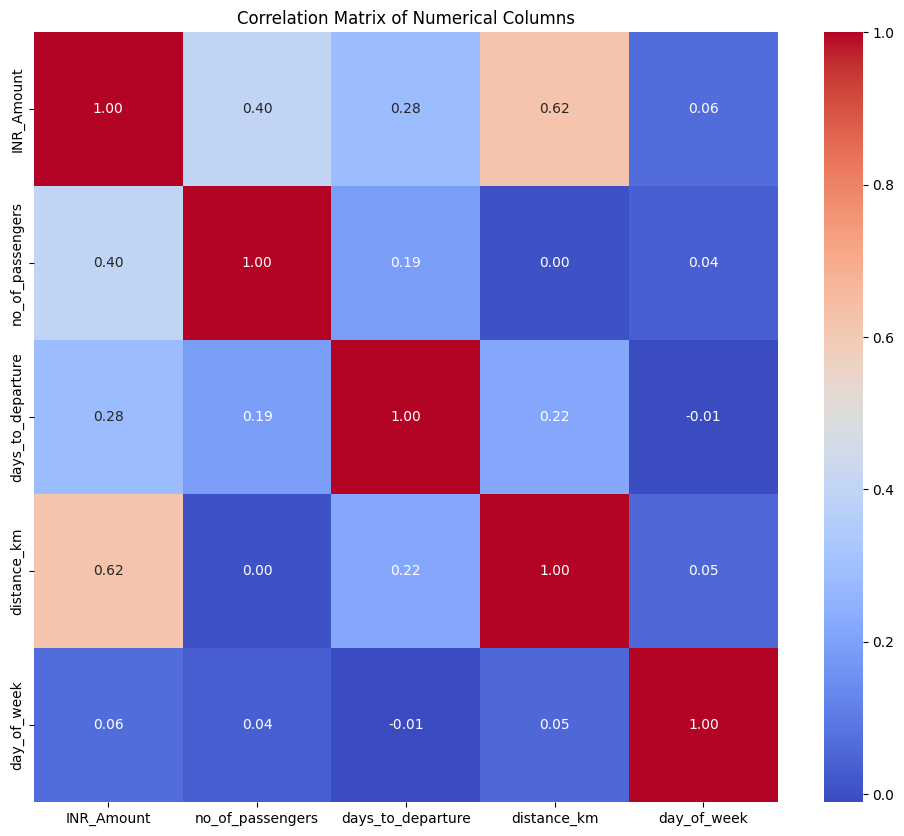

The pair of numerical columns with the maximum correlation is: ('INR_Amount', 'distance_km') (Correlation: 0.62)


In [11]:
# Calculate the correlation matrix for numerical columns
numerical_cols = bookings.select_dtypes(include=np.number)
correlation_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

# Find the pair of columns with the maximum correlation (excluding self-correlation)
max_correlation = 0
max_correlation_pair = None

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > abs(max_correlation):
            max_correlation = correlation
            max_correlation_pair = (col1, col2)

print(f"The pair of numerical columns with the maximum correlation is: {max_correlation_pair} (Correlation: {max_correlation:.2f})")

The result signifies a moderate positive correlation (0.62) between INR_Amount and distance_km (distance traveled). This suggests that as the distance of the trip increases, the booking value tends to rise, likely reflecting higher charges for longer journeys.


# 8. For each service, which is the most used device type for making bookings on the platform?

Most used device type for each service:
  service_name device_type_used  booking_count
2      GOIBIBO              IOS             70
5          MMT          Desktop             30
9        YATRA          Desktop             51


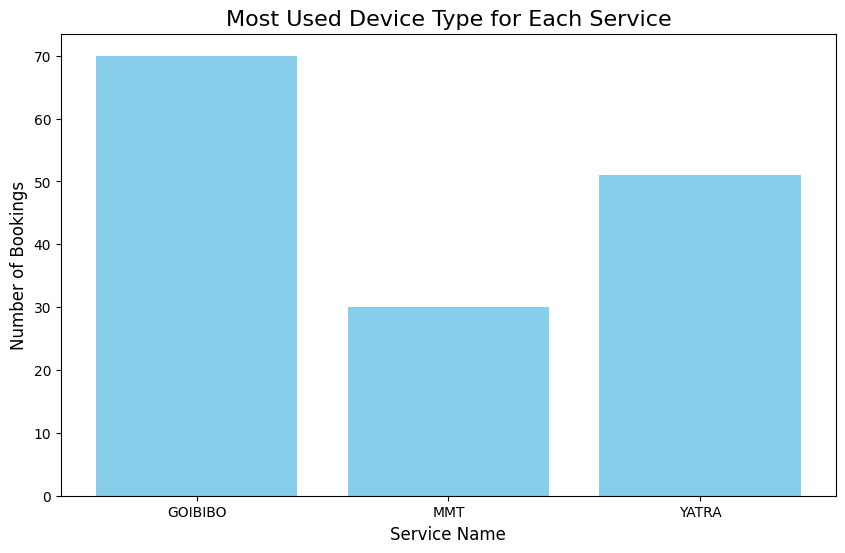

In [28]:
# Grouping by 'service_name' and 'device_type_used', and count bookings
service_device_counts = bookings.groupby(['service_name', 'device_type_used'])['booking_id'].count().reset_index()

# Renaming columns for clarity
service_device_counts.columns = ['service_name', 'device_type_used', 'booking_count']

# For each service, find the device type with the maximum count
most_used_device = service_device_counts.loc[service_device_counts.groupby('service_name')['booking_count'].idxmax()]

# Displaying the results
print("Most used device type for each service:")
print(most_used_device)


# Ploting the most used devices for each service

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(most_used_device['service_name'], most_used_device['booking_count'], color='skyblue')
plt.title('Most Used Device Type for Each Service', fontsize=16)
plt.xlabel('Service Name', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.show()


The results show the most used devices for booking across different services. GOIBIBO customers predominantly use iOS devices with 70 bookings, while MMT and YATRA users prefer Desktop devices, with 30 and 51 bookings, respectively. This suggests that mobile usage is dominant for GOIBIBO, while desktop devices are more popular for MMT and YATRA.

# 9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.

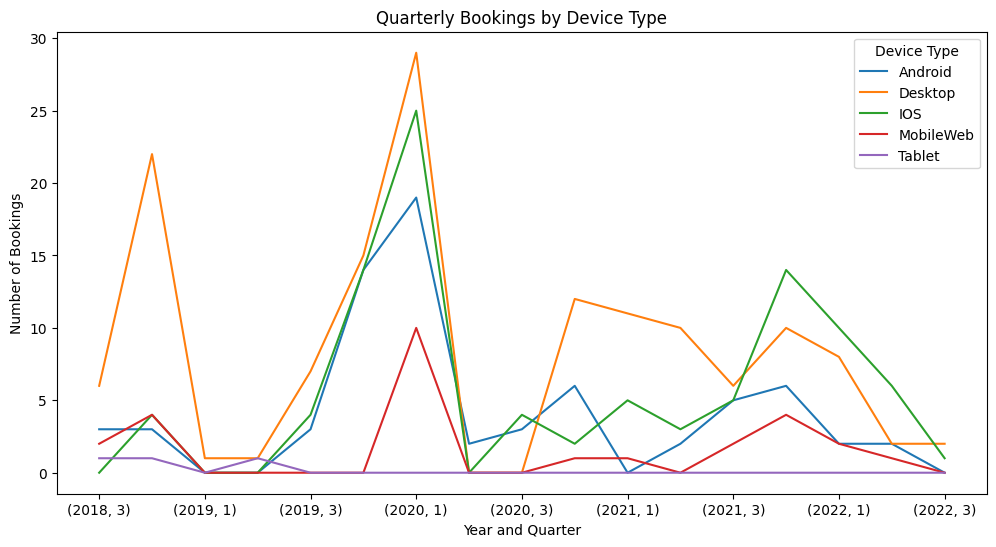

In [13]:

# Converting 'booking_time' to datetime objects if not already done
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

# Creating year and quarter columns
bookings['year'] = bookings['booking_time'].dt.year
bookings['quarter'] = bookings['booking_time'].dt.quarter

# Grouping by year, quarter, and device type, then count bookings
quarterly_bookings = bookings.groupby(['year', 'quarter', 'device_type_used'])['booking_id'].count().reset_index()

# Pivot table for plotting
quarterly_bookings_pivot = quarterly_bookings.pivot_table(index=['year', 'quarter'], columns='device_type_used', values='booking_id', fill_value=0)

# Ploting the time series for each device type
quarterly_bookings_pivot.plot(figsize=(12, 6))
plt.xlabel('Year and Quarter')
plt.ylabel('Number of Bookings')
plt.title('Quarterly Bookings by Device Type')
plt.legend(title='Device Type')
plt.show()

The plot shows quarterly bookings by device type (Android, Desktop, iOS, MobileWeb, Tablet) from Q3 2018 to Q3 2022. Desktop, iOS, and Android saw a significant spike in Q1 2020, with Desktop peaking at 29 bookings. Afterward, bookings declined and fluctuated, with iOS showing another rise in Q3 2021. MobileWeb had minimal activity, peaking briefly, while Tablet consistently had the lowest bookings. Overall, Desktop and iOS dominated the trends, especially during Q1 2020.

# 10. Consider the following example: 12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total.  

Searches= 100 bookings = 10 customers = 12

The overall booking to search ratio, Ober, is 10/100 = 0. 1

Using the above information/context, answer the following:

a. What is the average oBSR for each month of the year?

b. What is the average oBSR for each day of the week?


c. Plot a time series of oBSR on all the given dates.

## 10 a. What is the average oBSR for each month of the year?


In [19]:
# a. What is the average oBSR for each month of the year?

# Converting booking_time and search_time to datetime
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])
sessions['search_time'] = pd.to_datetime(sessions['search_time']) 

# Extracting month and year
bookings['month_year'] = bookings['booking_time'].dt.to_period('M')
sessions['month_year'] = sessions['search_time'].dt.to_period('M')

# Grouping bookings by month-year and count total bookings
monthly_bookings = bookings.groupby('month_year')['booking_id'].count()

# Grouping sessions by month-year and count total searches
monthly_searches = sessions.groupby('month_year')['search_id'].count()

# Computing the oBSR for each month
monthly_obsr = (monthly_bookings / monthly_searches).reset_index()
monthly_obsr.columns = ['month_year', 'oBSR']

# Calculating the average oBSR
average_obsr = monthly_obsr['oBSR'].mean()

# Displaying the results
print("oBSR for each month:")
print(monthly_obsr)
print(f"\n Average oBSR across all months: {average_obsr}")

oBSR for each month:
   month_year      oBSR
0     2018-09  0.363636
1     2018-10  0.087379
2     2018-11  0.212766
3     2018-12  0.171429
4     2019-01  0.200000
5     2019-06  1.000000
6     2019-07  0.208333
7     2019-08  0.285714
8     2019-09  0.280000
9     2019-10  0.214286
10    2019-11  0.258065
11    2019-12  0.213115
12    2020-01  0.200000
13    2020-02  0.283582
14    2020-03  0.255319
15    2020-05  0.062500
16    2020-06  0.333333
17    2020-07  0.095238
18    2020-08  0.500000
19    2020-09  0.333333
20    2020-10  0.461538
21    2020-11  0.343750
22    2020-12  0.666667
23    2021-01  0.533333
24    2021-02  0.285714
25    2021-03  0.277778
26    2021-04  0.250000
27    2021-05  0.500000
28    2021-06  0.428571
29    2021-07  0.105263
30    2021-08  0.210526
31    2021-09  0.500000
32    2021-10  0.267857
33    2021-11  0.140845
34    2021-12  0.250000
35    2022-01  0.269231
36    2022-02  0.275862
37    2022-03  0.175000
38    2022-04  0.375000
39    2022-05  0.26

The result shows the monthly Booking to Search Ratio (oBSR), with values ranging from 0.06 to 1.0. Periods like 2019-06 have a peak oBSR of 1.0, suggesting high conversion, while others, like 2020-05, have low values, indicating fewer bookings relative to searches. This reflects seasonal trends and varying customer engagement across months.

## 10 b. What is the average oBSR for each day of the week?

oBSR for each day of the week:
  day_of_week      oBSR
0      Friday  0.251232
1      Monday  0.200787
2    Saturday  0.220000
3      Sunday  0.309735
4    Thursday  0.222603
5     Tuesday  0.270642
6   Wednesday  0.156682

Average oBSR across all days of the week: 0.23309720159334213


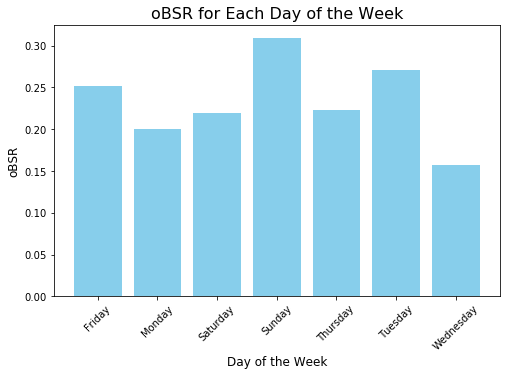

In [46]:
# b. What is the average oBSR for each day of the week?

# Converting booking_time and search_time to datetime
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])
sessions['search_time'] = pd.to_datetime(sessions['search_time'])

# Extracting day of the week
bookings['day_of_week'] = bookings['booking_time'].dt.day_name()
sessions['day_of_week'] = sessions['search_time'].dt.day_name()

# Grouping bookings by day of the week and count total bookings
daily_bookings = bookings.groupby('day_of_week')['booking_id'].count()

# Grouping sessions by day of the week and count total searches
daily_searches = sessions.groupby('day_of_week')['search_id'].count()

# Computing the oBSR for each day of the week
daily_obsr = (daily_bookings / daily_searches).reset_index()
daily_obsr.columns = ['day_of_week', 'oBSR']

# Calculating the average oBSR
average_daily_obsr = daily_obsr['oBSR'].mean()

# Displaying the results
print("oBSR for each day of the week:")
print(daily_obsr)
print(f"\nAverage oBSR across all days of the week: {average_daily_obsr}")


# Ploting the oBSR by day of the week
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(daily_obsr['day_of_week'], daily_obsr['oBSR'], color='skyblue')
plt.title('oBSR for Each Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('oBSR', fontsize=12)
plt.xticks(rotation=45)
plt.show()


The result shows the Booking to Search Ratio (oBSR) for each day of the week, with Sunday having the highest ratio (0.31), indicating more bookings relative to searches. Wednesday has the lowest ratio (0.16), suggesting fewer bookings on that day. The average oBSR across all days is 0.23, highlighting an overall moderate booking conversion. Businesses can focus on optimizing engagement on days with lower oBSR, such as Wednesday, while capitalizing on higher-performing days like Sunday.

## 10 c. Plot a time series of oBSR on all the given dates.

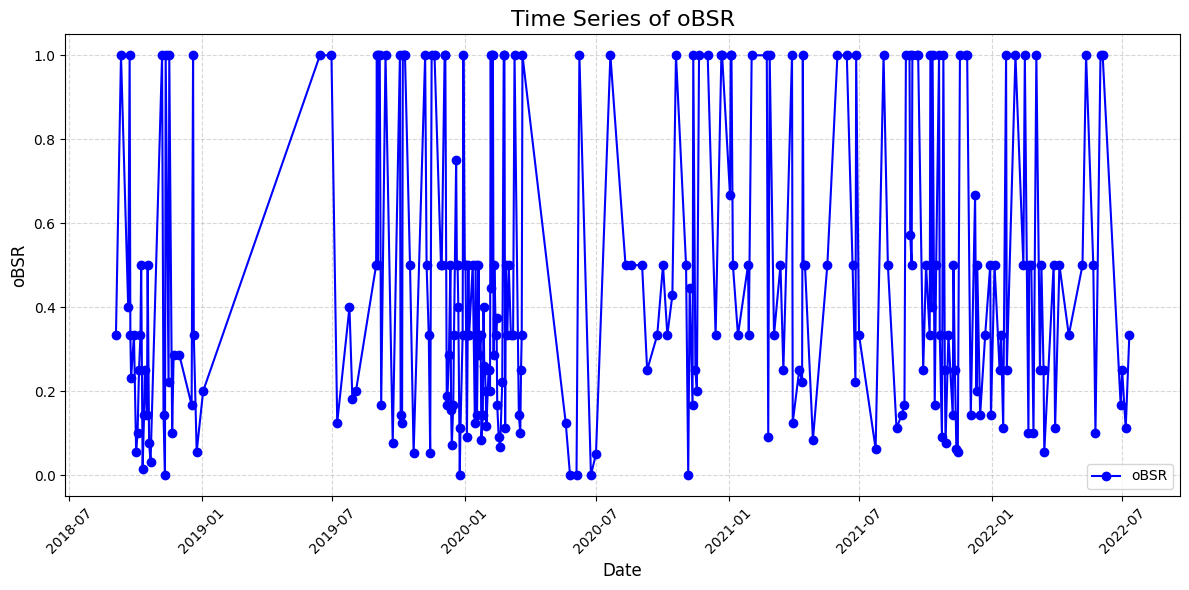

In [18]:
# c. Plot a time series of oBSR on all the given dates.

import matplotlib.pyplot as plt

# Converting booking_time and search_time to datetime
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])
sessions['search_time'] = pd.to_datetime(sessions['search_time'])

# Extracting the date
bookings['date'] = bookings['booking_time'].dt.date
sessions['date'] = sessions['search_time'].dt.date

# Grouping by date to count total bookings and searches
daily_bookings = bookings.groupby('date')['booking_id'].count()
daily_searches = sessions.groupby('date')['search_id'].count()

# Aligning the bookings and searches by date (handling missing dates)
daily_data = pd.DataFrame({
    'total_bookings': daily_bookings,
    'total_searches': daily_searches
}).fillna(0)

# Computing the oBSR for each date
daily_data['oBSR'] = daily_data['total_bookings'] / daily_data['total_searches']

# Plot the time series of oBSR
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['oBSR'], marker='o', color='blue', label='oBSR')
plt.title('Time Series of oBSR', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('oBSR', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The graph shows a time series of oBSR from mid-2018 to mid-2022, fluctuating between 0.0 and 1.0. It exhibits frequent spikes to 1.0, drops to 0.0, and irregular patterns, indicating high variability without a clear trend or seasonality.